<a href="https://colab.research.google.com/github/rishabhk0/Rishabh_ML_AI/blob/main/Breast_cancer_diagnostic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#checking if the Python version in the environment is 3.7 or higher.
import sys
assert sys.version_info >= (3,7)

**Problem Defination**: The project aims to develop a machine learning classification model using the Breast Cancer Wisconsin (Diagnostic) dataset to predict whether a breast tumor is malignant or benign, based on cellular characteristics obtained from medical imaging.

In [2]:
#importing the breast cancer datset
from google.colab import files
uploaded = files.upload()

Saving wdbc.data to wdbc.data


In [3]:
# Importing the in-built python libraries which we use in this prooblem

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [8]:
# Reading the dataset using pandas library

df = pd.read_csv('wdbc.data', header=None)

In [9]:
#Displaying the first five rows of dataset so that we can analyze dataset
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
#add titles to columns

df.columns = ['Id', ' Diagnosis', 'radius1', 'texture1','perimeter1','area1','smoothness1','compactness1','concavity1','concave_point1','symmetry1','fractical_dimension1','radius2', 'texture2','perimeter2','area2','smoothness2','compactness2','concavity2','concave_point2','symmetry2','fractical_dimension2','radius3', 'texture3','perimeter3','area3','smoothness3','compactness3','concavity3','concave_point3','symmetry3','fractical_dimension3' ]

In [11]:
# The dataset seems to have 30 feaures and 1 target value
df.head()

,Id,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_point1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_point3,symmetry3,fractical_dimension3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


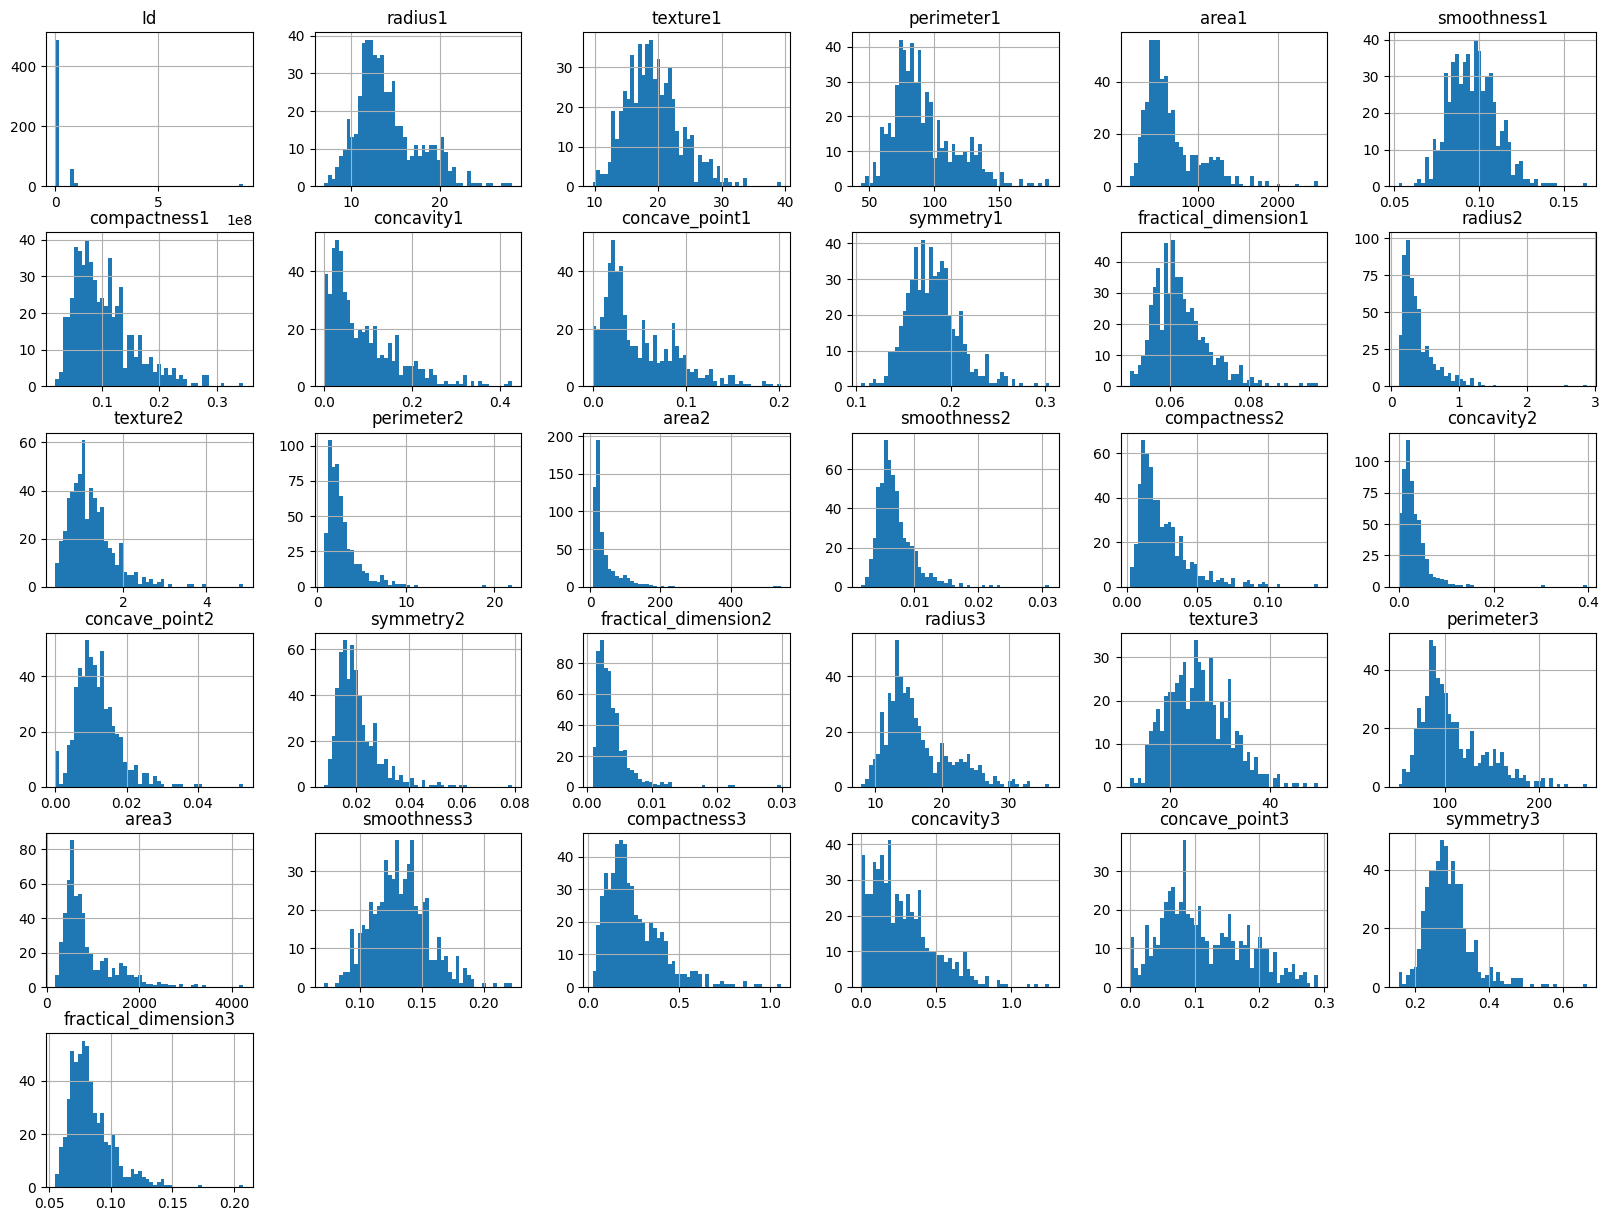

In [15]:
#Reading the datset through matpoltlib
df.hist(bins=50, figsize=(20,15))
plt.show()

In [12]:
df.info()
#dataset have no null values, next we will check if the dataset has any missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    569 non-null    int64  
 1    Diagnosis            569 non-null    object 
 2   radius1               569 non-null    float64
 3   texture1              569 non-null    float64
 4   perimeter1            569 non-null    float64
 5   area1                 569 non-null    float64
 6   smoothness1           569 non-null    float64
 7   compactness1          569 non-null    float64
 8   concavity1            569 non-null    float64
 9   concave_point1        569 non-null    float64
 10  symmetry1             569 non-null    float64
 11  fractical_dimension1  569 non-null    float64
 12  radius2               569 non-null    float64
 13  texture2              569 non-null    float64
 14  perimeter2            569 non-null    float64
 15  area2                 5

In [14]:
 #Check for missing values in each column
missing_values = df.isnull().sum()

# Display the count of missing values for each column
print("Missing values per column:")
display(missing_values)

Missing values per column:


,0
Id,0
Diagnosis,0
radius1,0
texture1,0
perimeter1,0
area1,0
smoothness1,0
compactness1,0
concavity1,0
concave_point1,0


In [20]:
# Now since all the features are in float we don't have to convert them but the target values are in object, so we have to convert them into int type
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df[' Diagnosis']= le.fit_transform(df[' Diagnosis'])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    569 non-null    int64  
 1    Diagnosis            569 non-null    int64  
 2   radius1               569 non-null    float64
 3   texture1              569 non-null    float64
 4   perimeter1            569 non-null    float64
 5   area1                 569 non-null    float64
 6   smoothness1           569 non-null    float64
 7   compactness1          569 non-null    float64
 8   concavity1            569 non-null    float64
 9   concave_point1        569 non-null    float64
 10  symmetry1             569 non-null    float64
 11  fractical_dimension1  569 non-null    float64
 12  radius2               569 non-null    float64
 13  texture2              569 non-null    float64
 14  perimeter2            569 non-null    float64
 15  area2                 5

In [25]:
#Spilting the dataset into X and y for training using .drop function
X = df.drop(' Diagnosis', axis=1)
y = df[' Diagnosis']

In [26]:
# spliting the dataset into training and testing dataset using in-built sklearn function- train_test_split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [27]:
X.shape

(569, 31)

In [28]:
y.shape

(569,)

In [29]:
#shuffling the dataset using sklearn in built function- shuffle

from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=42)
X_test, y_test = shuffle(X_test, y_test, random_state=42)

In [31]:
X_train.head()

,Id,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_point1,symmetry1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_point3,symmetry3,fractical_dimension3
95,86208,20.26,23.03,132.40,1264.0,0.09078,0.13130,0.14650,0.08683,0.2095,...,24.22,31.59,156.10,1750.0,0.1190,0.3539,0.40980,0.15730,0.3689,0.08368
93,862009,13.45,18.30,86.60,555.1,0.10220,0.08165,0.03974,0.02780,0.1638,...,15.10,25.94,97.59,699.4,0.1339,0.1751,0.13810,0.07911,0.2678,0.06603
401,904647,11.93,10.91,76.14,442.7,0.08872,0.05242,0.02606,0.01796,0.1601,...,13.80,20.14,87.64,589.5,0.1374,0.1575,0.15140,0.06876,0.2460,0.07262
345,898677,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,0.1633,...,10.88,19.48,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488
194,87556202,14.86,23.21,100.40,671.4,0.10440,0.19800,0.16970,0.08878,0.1737,...,16.08,27.78,118.60,784.7,0.1316,0.4648,0.45890,0.17270,0.3000,0.08701


In [32]:
# Using Logistic regression model for the training/ I used Logistic Regression method for trining because it is relatively simple algorithm for binary classification, and it works by estimating the probability that a given input belongs to a particular class.

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [33]:
#Predicting the values
y_prediction = model.predict(X_test)


In [34]:
# printing the predicted values
print(y_prediction)

[1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 1
 0 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0
 0 1 1]


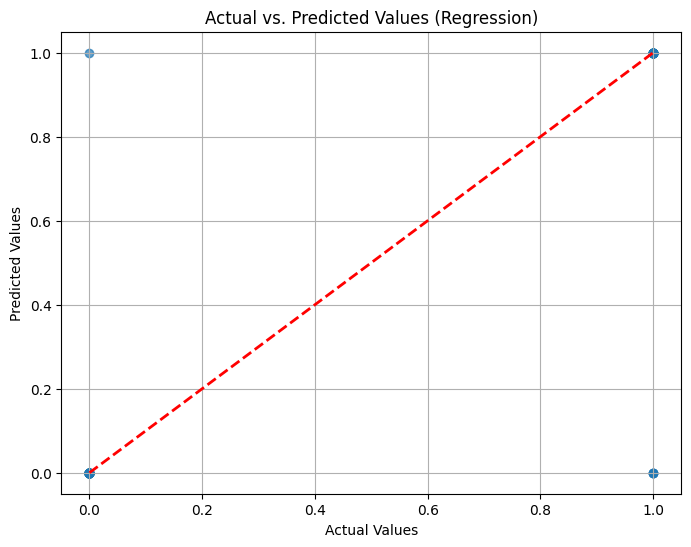

In [35]:
    # Plotting the actual vaues vs predicted values

    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_prediction, alpha=0.7)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2) # Diagonal line
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs. Predicted Values (Regression)")
    plt.grid(True)
    plt.show()


In [36]:
# calculating the accuracy of the model using sklearn library /I used accuracy metric because it tells the direct proportion of correct predictions made by the model, hence it is a good starting point for evaluationg a classifier.
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_prediction)


In [40]:
# print the accuracy score
print(accuracy)

0.956140350877193
